# Line labels

In order to measure a line, $\mathrm{LiMe}$ requires a name which includes the particle responsible for the transition and its wavelength, in the restframe. This design follows the style used in the [PyNeb](http://research.iac.es/proyecto/PyNeb/) library by [Luridiana et al. (2015)](https://www.aanda.org/articles/aa/abs/2015/01/aa23152-13/aa23152-13.html) and [Morisset et al. (2020)](https://www.mdpi.com/2218-2004/8/4/66).

<img src="../images/label_components.png" width="1060" />

As it can be appreciated from the figure above, we have **core** components and **optional** components. Components are separated by **underscores (_)** while **items** in a given component are separated by **dashes (-)**.

## Core components 

These are the compulsory elements of the label whose order is fixed.

### 1) Particle

The first component of the line label is the particle responsible for the transition

By default $\mathrm{LiMe}$ expects the particle [chemical symbol](https://en.wikipedia.org/wiki/Chemical_symbol) followed by the ionization state in Arabic numerals. If the particle is recognized, its mass will be used to compute the thermal dispersion velocity correction in the output measurements. 

The user can add additional details to the transition by via dashses. For example: *H1_18750A*, *H1-PashchenAlpha_1.875nm*, or *H1-3comps_1.875nm* are all processed similarly.

### 2) Wavelength

The second item is the transition wavelength. This positive real number must be followed by the transition’s wavelength or frequency units. These units must follow [AstroPy notation](https://docs.astropy.org/en/stable/units/standard_units.html), with the exception of the **Angstroms** which can be defined with an "**A**", in addition to "**AA**" or "**Angstrom**"".

<div class="alert alert-info">

**Please remember:** $\mathrm{LiMe}$ assumes that this wavelength is in the restframe. 

</div>

### 3) Modularity component

The final core component informs $\mathrm{LiMe}$ if the line consists in one or multiple transitions. This **component must be at the end** of the label. The figure below shows an example of each modularity type for the $[SII]6716,6731Å$ doublet from different instruments:

<img src="../images/lines_by_components.png" width="1060" />

* **Single lines**: An emission or absorption transition which can be modeled with a single profile. By default all lines without a modularity profile are considered single transitions.
* **Blended lines**: A blended line consists in several transtions and/or kinematic components. If the user adds the the **_b** suffix and **includes the components** in the fitting configuration (joined by "+"), a multi-component fitting will be performed. In the X-SHOTTER observation above the blended transitions description would look like:

     ```S2_6716A_b = "S2_6716A+S2_6731A+S2_6716A_k-1+S2_6731A_k-1+S2_6716A_k-2+S2_6731A_k-2"```
  
    in a succesfull fitting, the individual transition measurements are store in the output measurements table and the components string is stored on the `group_label` column.

* **Merged lines**: As in the case of a blended one, a merged line has multiple components. It must include the *"_m"* suffix **and** the components in the fitting configuration (joined by "+"). However,  $\mathrm{LiMe}$ will only fit **one component**. This classification is useful as in the JWST observation above where the noise dominates one of the transitions but we still want to keep track of the components. The fitting configuration for such a line would be:

     `S2_6716A_m = "S2_6716A+S2_6731A"`
  
    the output measurements table will display the line as $\tt{S2_6716A_m}$ and the components string is stored on the `group_label` column.

## Optional suffixes 

Unlike the core components, the optional suffixes have default values. This means that the user **can exclude them** from the label and their **order is free**:

<img src='../images/label_all_components.png' width="1200" />

If the user includes any of these components they **must start** with a certain letter followed by a dash **"-"**.

### Kinematic component (k)

This first item is the letter "k", while the second one is the component cardinal number. In single and merged lines, $\mathrm{LiMe}$ assumes a unique kinematic component "0". Therefore, in blended lines, the user should name the second component k-1, the third as k-2, and so on.

<div class="alert alert-info">

**Please remember:** It's recommended to define the kinematic components from lower to higher dispersion velocity. However, users need      to specify the boundary conditions in the fitting configuration to ensure such a pattern: 


O3_5007A_b = "O3_5007A+O3_5007A_k-1+O3_5007A_k-2"

O3_5007A_k-1_sigma = "expr:>2.0*O3_5007A_sigma"

O3_5007A_k-2_sigma = "expr:>2.0*O3_5007A_k-1_sigma"

where O3_5007A would be the narrower component.

</div>



### Profile component (k)

The first item is the letter "p" followed by a pair of strings specifying the profile type. At present, LiMe fits Gaussian, Lorentz, pseudo-Voigt and exponential profiles in emission or absorption. These are some examples:
* p-g or p-g-emis: Emission Gaussian (Default)
* p-abs or p-g-abs : Absorption Gaussian 
* p-l-abs: Absorption Lorentz 
* p-e or p-e-emis: Emission exponential 
* p-pv or p-pv-emis: Emission Pseudo-Voigt emissio

### Transition component (k)

This component provides information regarding the line transition in order to construct the output `latexlabel` value on the measurements. The options currently available are:
* t-rec: Recombination line
* t-col: Collisional excited line
* t-sem: Semi-forbidden transition line
* t-mol: Mollecular line

## Fitting lines from labels

$\mathrm{LiMe}$ includes a lines database with their labels and lines which can be declared as a dataframe using the $\tt{lime.line\_bands}$ command:

In [1]:
import lime
from pathlib import Path

lines_db = lime.line_bands()

print(lines_db)

                wavelength     wave_vac             w1             w2  \
H1_1215A         1215.1108    1215.6699    1100.000000    1150.000000   
N4_1483A         1483.3300    1483.3300    1450.000000    1460.000000   
N4_1487A         1486.5000    1486.5000    1450.000000    1460.000000   
C4_1548A         1547.6001    1548.1870    1440.000000    1450.000000   
He2_1640A        1639.7896    1640.3913    1600.000000    1630.000000   
...                    ...          ...            ...            ...   
Ne3_155600A    155600.0000  155600.0000  155008.881230  155234.494353   
H2-S1_170300A  170300.0000  170300.0000  170000.000000  170100.000000   
S3_187100A     187100.0000  187100.0000  186289.064584  186679.342348   
Ne5_243200A    243200.0000  243200.0000  242435.988182  242853.181654   
O4_258900A     258900.0000  258900.0000  257943.398290  258470.089756   

                          w3             w4             w5             w6  \
H1_1215A         1195.000000    1230.000000   

If we load an observation from the [examples/sample_data](https://github.com/Vital-Fernandez/lime/tree/master/examples/sample_data). folder:

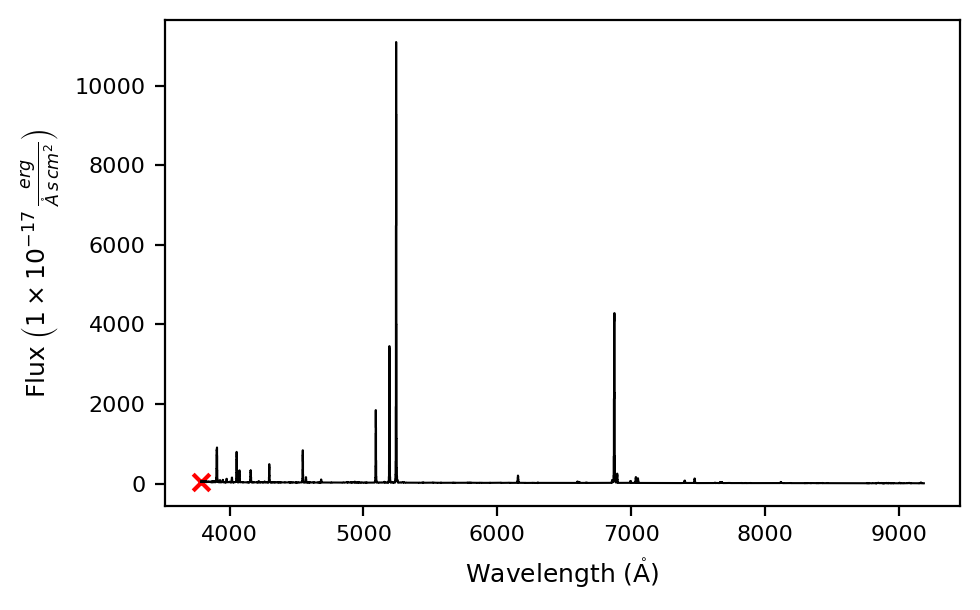

In [3]:
data_folder = Path('../sample_data/spectra')
sloan_SHOC579 = data_folder/'sdss_dr18_0358-51818-0504.fits'
spec = lime.Spectrum.from_file(sloan_SHOC579, instrument='sdss', redshift=0.0475)
spec.plot.spectrum()

We can fit a line using the $\tt{.fit.bands}$ command:

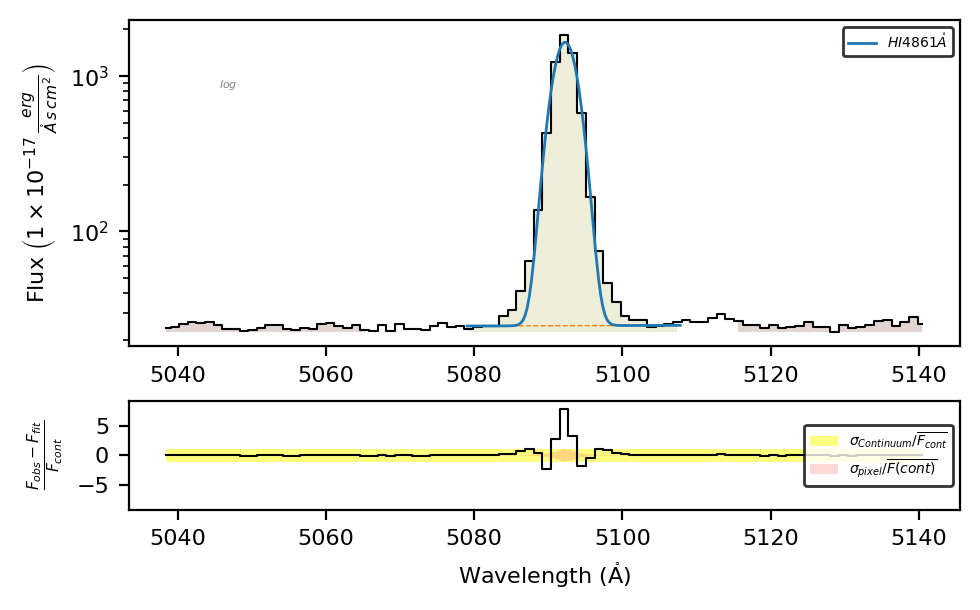

In [4]:
spec.fit.bands(4861)
spec.plot.bands()

In the case above, we use a wavelength to look for $H\beta$: The float entry is queried on the "wavelength" column from the default lines database. However, it is recomended that you use the default notation to look for the line:

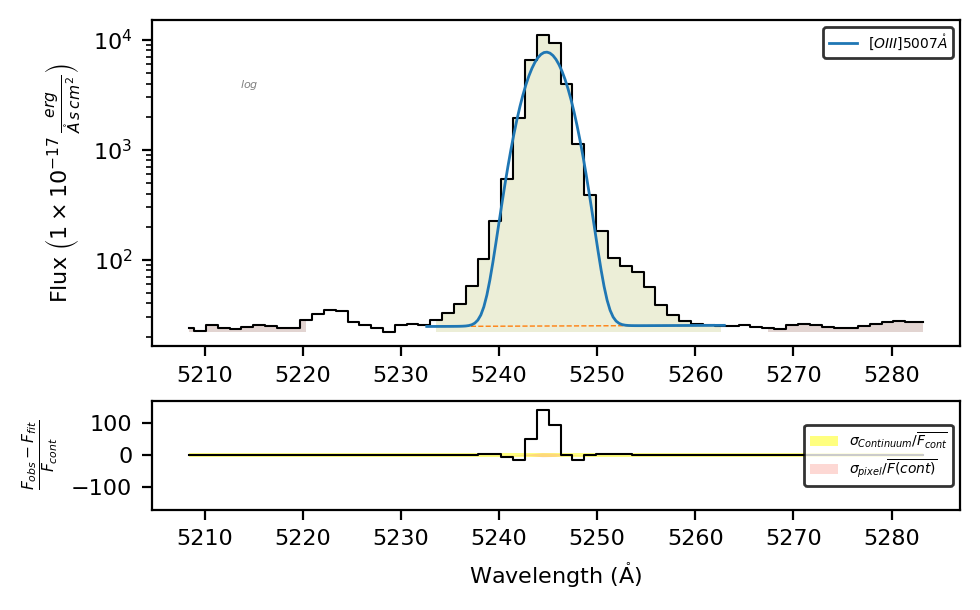

In [5]:
spec.fit.bands('O3_5007A')
spec.plot.bands()

Finally, you can also use the $\tt{lime.line\_bands}$ to adjust the line labels from the database, for example setting the units: 

In [7]:
import lime
from pathlib import Path

lines_db = lime.line_bands(wave_intvl=(1, 3), units_wave='um', decimals=3, update_latex=True)

print(lines_db)

             wavelength  wave_vac        w1        w2        w3        w4  \
H1_1.005um     1.004922  1.005212  0.996333  1.001410  1.003391  1.007849   
He1_1.083um    1.083018  1.083331  1.075342  1.079426  1.080204  1.085553   
H1_1.094um     1.093792  1.094108  1.072044  1.077867  1.090000  1.096000   
O1_1.129um     1.128700  1.128700  1.120000  1.126000  1.127500  1.130000   
Fe2_1.257um    1.256600  1.256600  1.248500  1.254000  1.255500  1.257500   
H1_1.282um     1.281788  1.282158  1.270712  1.277035  1.279831  1.284890   
Fe2_1.644um    1.644322  1.644796  1.641000  1.642500  1.643500  1.644500   
H1_1.875um     1.875069  1.875610  1.860956  1.865684  1.872105  1.879684   
H1_1.945um     1.944529  1.945089  1.931643  1.939254  1.942560  1.947019   
H2_1.957um     1.957036  1.957600  1.931721  1.941740  1.953152  1.960966   
Si6_1.964um    1.964034  1.964600  1.959500  1.961000  1.961500  1.962500   
He1_2.058um    2.058098  2.058690  2.043614  2.050647  2.055375  2.061928   

## Takeaways

* The $\mathrm{LiMe}$ has a somewhat strict, but flexible, transition naming notation which must be input to measure a line. This must include the particle and transition wavelength but it can be expanded to state the type of fitting, the transition components and the fitting/analysis boundaries.
* In order to do a multi-profile fitting of a line, you must use the blended suffix **('_b')** and the components of the transition.
* You can use the merge suffix **('_b')** for a single profile fitting in but keeping track of multiple transitions on the output measurements.
* The optional kinematic component **(_k-)** should be used for fittings involving multiple kinematic components, but remember to add the boundary conditions on the fitting configuration to maintain the order.
* The optional profile component **(_p-)** can be used to specify the profile type (for example Lorentz) and shape (for example absorption).
* The optional transition component **(_t-)** can be used to specify the transition (recombination, forbiddent, mollecular...) this impacts the automatic `latexlabel` notation